## ANALISIS FLUKTUASI HARGA CABAI MERAH BESAR DI PROVINSI LAMPUNG DENGAN METODE BOOTSTRAP

1. IMPORT & LOAD DATA

In [8]:
# Pastikan sudah set working directory ke lokasi file
# Misal: setwd("C:/Users/fby/Downloads")

data_raw <- read.csv("/content/Tabel Harga Cabe - Sheet.csv",
                     check.names = FALSE)  # biar nama kolom tanggal tidak diubah otomatis

# Lihat struktur awal
head(data_raw)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/Tabel Harga Cabe - Sheet.csv'”


,No,Komoditas (Rp),01/ 07/ 2025,02/ 07/ 2025,03/ 07/ 2025,04/ 07/ 2025,07/ 07/ 2025,08/ 07/ 2025,09/ 07/ 2025,10/ 07/ 2025,⋯,18/ 09/ 2025,19/ 09/ 2025,22/ 09/ 2025,23/ 09/ 2025,24/ 09/ 2025,25/ 09/ 2025,26/ 09/ 2025,29/ 09/ 2025,30/ 09/ 2025,01/ 10/ 2025
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,I,Cabai Merah,"38,350","38,650","40,900","40,300","40,350","40,600","40,350","40,100",⋯,"61,450","57,400","59,650","60,850","61,300","59,800","59,050","55,500","52,200","50,400"


2. FILTER KOMODITAS "CABAI MERAH"

In [9]:
library(dplyr)

data_cabai <- data_raw %>%
  filter(grepl("Cabai Merah", `Komoditas (Rp)`))
data_cabai


No,Komoditas (Rp),01/ 07/ 2025,02/ 07/ 2025,03/ 07/ 2025,04/ 07/ 2025,07/ 07/ 2025,08/ 07/ 2025,09/ 07/ 2025,10/ 07/ 2025,⋯,18/ 09/ 2025,19/ 09/ 2025,22/ 09/ 2025,23/ 09/ 2025,24/ 09/ 2025,25/ 09/ 2025,26/ 09/ 2025,29/ 09/ 2025,30/ 09/ 2025,01/ 10/ 2025
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
I,Cabai Merah,"38,350","38,650","40,900","40,300","40,350","40,600","40,350","40,100",⋯,"61,450","57,400","59,650","60,850","61,300","59,800","59,050","55,500","52,200","50,400"


3. UBAH DATA MENJADI LONG FORMAT

In [10]:
library(tidyr)

data_long <- data_cabai %>%
  pivot_longer(
    cols = -c(No, `Komoditas (Rp)`),
    names_to = "Tanggal",
    values_to = "Harga"
  )
data_long

No,Komoditas (Rp),Tanggal,Harga
<chr>,<chr>,<chr>,<chr>
I,Cabai Merah,01/ 07/ 2025,"38,350"
I,Cabai Merah,02/ 07/ 2025,"38,650"
I,Cabai Merah,03/ 07/ 2025,"40,900"
I,Cabai Merah,04/ 07/ 2025,"40,300"
I,Cabai Merah,07/ 07/ 2025,"40,350"
I,Cabai Merah,08/ 07/ 2025,"40,600"
I,Cabai Merah,09/ 07/ 2025,"40,350"
I,Cabai Merah,10/ 07/ 2025,"40,100"
I,Cabai Merah,11/ 07/ 2025,"40,150"


4. CLEANING DATA

In [11]:
# Ubah format tanggal
data_long$Tanggal <- as.Date(trimws(data_long$Tanggal), format = "%d/%m/%Y")

# Hapus tanda koma dan ubah ke numerik
data_long$Harga <- as.numeric(gsub(",", "", data_long$Harga))


In [12]:
sum(is.na(data_long$Harga))   # jumlah data harga yang kosong
sum(is.na(data_long$Tanggal)) # cek juga tanggal kosong


[1] 0

[1] 0

In [13]:
# Pastikan sudah bersih
sum(is.na(data_long$Harga))

#lihat data kesluruhan
data_long

[1] 0

No,Komoditas (Rp),Tanggal,Harga
<chr>,<chr>,<date>,<dbl>
I,Cabai Merah,2025-07-01,38350
I,Cabai Merah,2025-07-02,38650
I,Cabai Merah,2025-07-03,40900
I,Cabai Merah,2025-07-04,40300
I,Cabai Merah,2025-07-07,40350
I,Cabai Merah,2025-07-08,40600
I,Cabai Merah,2025-07-09,40350
I,Cabai Merah,2025-07-10,40100
I,Cabai Merah,2025-07-11,40150


5. VISUALISASI FLUKTUASI HARGA

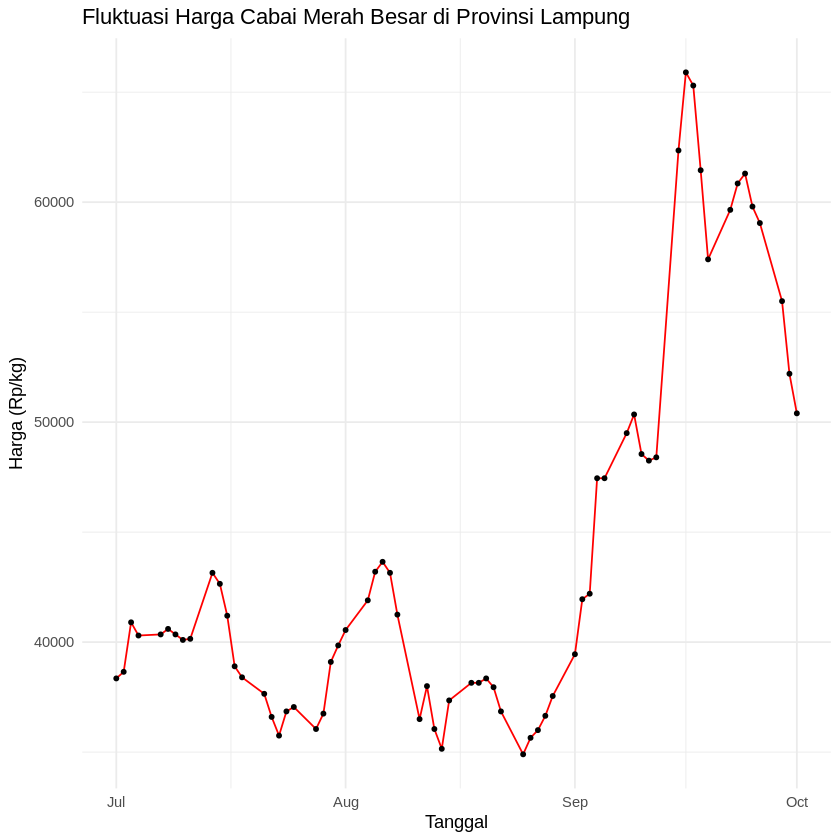

In [14]:
library(ggplot2)

ggplot(data_long, aes(x = Tanggal, y = Harga)) +
  geom_line(color = "red") +
  geom_point(size = 1) +
  labs(
    title = "Fluktuasi Harga Cabai Merah Besar di Provinsi Lampung",
    x = "Tanggal",
    y = "Harga (Rp/kg)"
  ) +
  theme_minimal()


6. BOOTSTRAP RATA-RATA HARGA

In [15]:
# Pastikan dataset bersih
head(data_long)
summary(data_long$Harga)


No,Komoditas (Rp),Tanggal,Harga
<chr>,<chr>,<date>,<dbl>
I,Cabai Merah,2025-07-01,38350
I,Cabai Merah,2025-07-02,38650
I,Cabai Merah,2025-07-03,40900
I,Cabai Merah,2025-07-04,40300
I,Cabai Merah,2025-07-07,40350
I,Cabai Merah,2025-07-08,40600


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900   37800   40350   43901   48325   65900 

In [16]:
set.seed(123)  # supaya hasil acak bisa direplikasi
n_boot <- 2000
n <- nrow(data_long)

# Vektor untuk menyimpan hasil rata-rata tiap bootstrap
boot_means <- numeric(n_boot)

# Loop bootstrap
for (i in 1:n_boot) {
  sample_data <- sample(data_long$Harga, size = n, replace = TRUE)
  boot_means[i] <- mean(sample_data)
}


In [17]:
mean_boot <- mean(boot_means)
sd_boot <- sd(boot_means)
ci_lower <- quantile(boot_means, 0.025)
ci_upper <- quantile(boot_means, 0.975)

cat("Rata-rata bootstrap :", round(mean_boot, 2), "\n")
cat("Standar deviasi     :", round(sd_boot, 2), "\n")
cat("95% Confidence Interval :", round(ci_lower, 2), "-", round(ci_upper, 2), "\n")


Rata-rata bootstrap : 43903.73 
Standar deviasi     : 1068.47 
95% Confidence Interval : 41839.35 - 46025.78 


Rata-rata harga cabai merah besar di Lampung selama periode pengamatan adalah sekitar Rp 43.903/kg.

Dengan tingkat kepercayaan 95%, rata-rata sebenarnya kemungkinan berada antara Rp 41839.35 - 46025.78/kg.

Deviasi standar 1068 menunjukkan fluktuasi harga moderat — harga relatif berfluktuasi dari minggu ke minggu, tapi masih dalam rentang stabil.

7. VISUALISASI DISTRIBUSI BOOTSTRAP

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


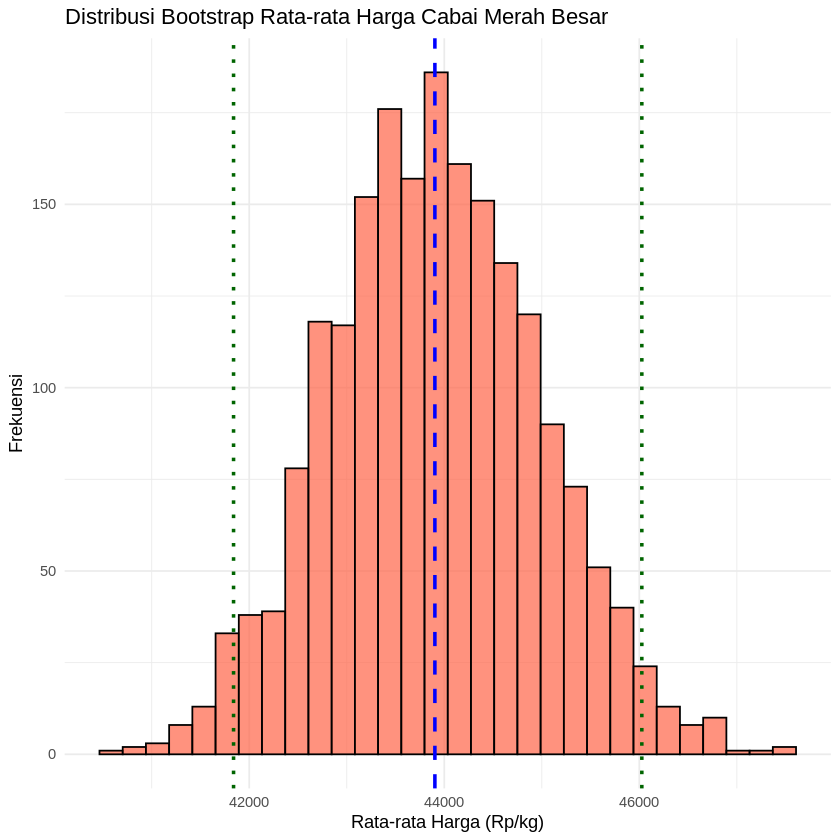

In [18]:
library(ggplot2)

ggplot(data.frame(boot_means), aes(x = boot_means)) +
  geom_histogram(bins = 30, fill = "tomato", color = "black", alpha = 0.7) +
  geom_vline(xintercept = mean_boot, color = "blue", linetype = "dashed", size = 1) +
  geom_vline(xintercept = c(ci_lower, ci_upper), color = "darkgreen", linetype = "dotted", size = 1) +
  labs(
    title = "Distribusi Bootstrap Rata-rata Harga Cabai Merah Besar",
    x = "Rata-rata Harga (Rp/kg)",
    y = "Frekuensi"
  ) +
  theme_minimal()


8. HITUNG STABILITAS PERUBAHAN HARIAN

In [19]:
data_long <- data_long %>%
  arrange(Tanggal) %>%
  mutate(Delta = Harga - lag(Harga))

sd(data_long$Delta, na.rm = TRUE)


[1] 2488.473